# **Integrasi Data**


## **Data Understanding**


### **Sumber dataset**

**" Prediksi hasil produksi kedelai (Grain Yield) dari pengukuran agronomis tanaman "**

UCI Machine Learning Repository Citation:

Dias, C. T. dos Santos, Ambrosano, E. J., Cantarella, H., & Crusciol, C. A. C. (2022). *Forty soybean cultivars from subsequent harvests* \[Data set]. UCI Machine Learning Repository. [https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests](https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests)



### **Penjelasan Fitur dan Variabel**

Dataset ini digunakan untuk memprediksi hasil produksi kedelai (Grain Yield) berdasarkan berbagai pengukuran agronomis tanaman. Hasil produksi kedelai merupakan faktor penting dalam penelitian pertanian, dan prediksinya dapat membantu dalam pemilihan varietas unggul dan pengambilan keputusan budidaya yang lebih tepat.

Pengumpulan data hasil panen secara langsung di lapangan membutuhkan waktu, biaya, dan tenaga yang besar. Oleh karena itu, digunakan pengukuran morfologi dan pertumbuhan tanaman yang lebih mudah diperoleh sebagai fitur prediktor. Informasi tambahan, seperti kondisi cuaca dan lokasi penanaman, juga dapat berkontribusi terhadap hasil panen, meskipun tidak tersedia dalam dataset ini.

Dataset ini telah dibersihkan dari nilai yang hilang dan setiap fitur numerik disiapkan untuk dapat digunakan dalam model pembelajaran mesin seperti Jaringan Syaraf Tiruan (JST).

Fitur-fitur yang digunakan antara lain:

* Season
* Cultivar
* Repetition
* PH
* IFP
* NLP
* NGP
* NGL
* NS
* MHG
* GY

Terjemahan:

* Musim tanam
* Kultivar
* Ulangan percobaan
* Tinggi tanaman
* Letak polong pertama
* Jumlah polong berisi
* Jumlah biji per tanaman
* Jumlah biji per polong
* Jumlah cabang
* Bobot 100 biji
* Hasil panen (target prediksi)



### **Eksplorasi data**


* Jumlah Data : 320 baris (observasi)
* Jumlah fitur: 11 kolom
* Missing Value : tidak ada (semua kolom lengkap)
* Jumlah Outlier :

In [49]:
import pandas as pd

# Load dataset
df = pd.read_csv('data.csv')

# Ambil kolom numerik saja
numeric_cols = df.select_dtypes(include='number').columns

# Fungsi untuk deteksi outlier menggunakan IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound))

# Hitung jumlah outlier per kolom
outlier_per_kolom = {}

for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    outlier_count = outliers.sum()
    outlier_per_kolom[col] = outlier_count
    print(f"Kolom {col}: {outlier_count} outlier")

# Total keseluruhan
total_outliers = sum(outlier_per_kolom.values())
print(f"\nTotal outlier di seluruh fitur numerik: {total_outliers}")


Kolom Season: 0 outlier
Kolom Repetition: 0 outlier
Kolom PH: 1 outlier
Kolom IFP: 9 outlier
Kolom NLP: 5 outlier
Kolom NGP: 9 outlier
Kolom NGL: 9 outlier
Kolom NS: 4 outlier
Kolom MHG: 0 outlier
Kolom GY: 10 outlier

Total outlier di seluruh fitur numerik: 47


### **Visualisasi data**

In [50]:
%pip install ucimlrepo

In [51]:
import pandas as pd

# Load dataset lokal
df = pd.read_csv("data.csv")

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["GY"])  # GY = Grain Yield (target)
y = df["GY"]

# Metadata sederhana
metadata = {
    "name": "Soybean Yield Dataset",
    "source": "Eksperimen agronomi",
    "instances": df.shape[0],
    "features": df.shape[1] - 1,
    "target": "GY (Grain Yield)",
    "feature_types": {
        "Season": "Numerik (Diskret)",
        "Cultivar": "Kategorikal",
        "Repetition": "Numerik (Diskret)",
        "PH": "Numerik (Kontinu)",
        "IFP": "Numerik (Kontinu)",
        "NLP": "Numerik (Kontinu)",
        "NGP": "Numerik (Kontinu)",
        "NGL": "Numerik (Kontinu)",
        "NS": "Numerik (Kontinu)",
        "MHG": "Numerik (Kontinu)",
    }
}

# Informasi variabel
variables = df.dtypes

# Tampilkan metadata
print("Metadata:")
for k, v in metadata.items():
    print(f"{k}: {v}")

# Tampilkan tipe variabel
print("\nVariable Information:")
print(variables)

Metadata:
name: Soybean Yield Dataset
source: Eksperimen agronomi
instances: 320
features: 10
target: GY (Grain Yield)
feature_types: {'Season': 'Numerik (Diskret)', 'Cultivar': 'Kategorikal', 'Repetition': 'Numerik (Diskret)', 'PH': 'Numerik (Kontinu)', 'IFP': 'Numerik (Kontinu)', 'NLP': 'Numerik (Kontinu)', 'NGP': 'Numerik (Kontinu)', 'NGL': 'Numerik (Kontinu)', 'NS': 'Numerik (Kontinu)', 'MHG': 'Numerik (Kontinu)'}

Variable Information:
Season          int64
Cultivar       object
Repetition      int64
PH            float64
IFP           float64
NLP           float64
NGP           float64
NGL           float64
NS            float64
MHG           float64
GY            float64
dtype: object


In [52]:
import pandas as pd

# Gabungkan kembali fitur dan target
df_soybean = pd.concat([X, y], axis=1)

# Tampilkan jumlah total baris dan isi dataset
print("Total baris dataset ini adalah =", len(df_soybean))
print("Visualisasi dataset kedelai:")
print(df_soybean.to_string(index=False))


Total baris dataset ini adalah = 320
Visualisasi dataset kedelai:
 Season                     Cultivar  Repetition    PH   IFP    NLP    NGP   NGL   NS    MHG          GY
      1                   NEO 760 CE           1 58.80 15.20  98.20 177.80  1.81 5.20 152.20 3232.820000
      1                   NEO 760 CE           2 58.60 13.40 102.00 195.00  1.85 7.20 141.69 3517.360000
      1                   NEO 760 CE           3 63.40 17.20 100.40 203.00  2.02 6.80 148.81 3391.460000
      1                   NEO 760 CE           4 60.27 15.27 100.20 191.93  1.89 6.40 148.50 3312.580000
      1                    MANU IPRO           1 81.20 18.00  98.80 173.00  1.75 7.40 145.59 3230.990000
      1                    MANU IPRO           2 75.80 20.80  69.20 128.00  1.85 7.20 154.87 3374.800000
      1                    MANU IPRO           3 84.40 15.80  95.40 161.80  1.70 6.80 150.23 3182.760000
      1                    MANU IPRO           4 80.47 18.20  87.80 154.27  1.77 7.13 149.90 3

In [53]:
# Simpan ke file CSV
df_soybean.to_csv('dataset_kedelai.csv', index=False)

## **Preprocessing Data**

### **Transformasi data**

Mengubah menjadi kategori seperti Rendah, Sedang, dan Tinggi

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# === 1. Load Dataset ===
df = pd.read_csv('/content/dataset_kedelai.csv')

# === 2. Ubah Target GY Jadi Kategori ===
def label_hasil(gb):
    if gb < 3200:
        return 'Rendah'
    elif gb < 3600:
        return 'Sedang'
    else:
        return 'Tinggi'

df['KategoriHasil'] = df['GY'].apply(label_hasil)


### **Normalisasi data**

Dataset dinormalisasi menggunakan StandarScaler dari library sklearn

In [55]:
# === 3. Encode Fitur Kategori "Cultivar" ===
le = LabelEncoder()
df['Cultivar'] = le.fit_transform(df['Cultivar'])  # Mengubah nama kultivar menjadi angka

# === 4. Pisahkan Fitur dan Label ===
X = df.drop(columns=['GY', 'KategoriHasil'])  # Fitur
y = df['KategoriHasil']                      # Label klasifikasi

# === 5. Scaling (Opsional tapi disarankan) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### **Split data**

Dataset dipisahkan menjadi 2 yaitu data testing 20% dan data traning 80%

In [56]:
# === 6. Split Data Training & Testing ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### **Visualisasi data setelah preprocessing**

In [57]:
import pandas as pd

# Gabungkan fitur dan target
df_gabungan = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika dataset kecil)
print("Total baris dataset ini adalah =", len(df_gabungan))
print("Visualisasi dataset setelah penggabungan fitur dan target")
print(df_gabungan.to_string(index=False))


Total baris dataset ini adalah = 320
Visualisasi dataset setelah penggabungan fitur dan target
 Season  Cultivar  Repetition    PH   IFP    NLP    NGP   NGL   NS    MHG KategoriHasil
      1        31           1 58.80 15.20  98.20 177.80  1.81 5.20 152.20        Sedang
      1        31           2 58.60 13.40 102.00 195.00  1.85 7.20 141.69        Sedang
      1        31           3 63.40 17.20 100.40 203.00  2.02 6.80 148.81        Sedang
      1        31           4 60.27 15.27 100.20 191.93  1.89 6.40 148.50        Sedang
      1        28           1 81.20 18.00  98.80 173.00  1.75 7.40 145.59        Sedang
      1        28           2 75.80 20.80  69.20 128.00  1.85 7.20 154.87        Sedang
      1        28           3 84.40 15.80  95.40 161.80  1.70 6.80 150.23        Rendah
      1        28           4 80.47 18.20  87.80 154.27  1.77 7.13 149.90        Rendah
      1         1           1 52.20 14.40  64.80 148.80  2.30 7.20 180.25        Tinggi
      1         1        

In [58]:
# Simpan ke file CSV
df_gabungan.to_csv('dataset_gabungan.csv', index=False)

## **Modelling**

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

### **Modelling Klasifikasi Dataset Grain Yield (GY) menggunakan Decision Tree**

Pemodelan ini bertujuan untuk mengklasifikasikan hasil panen (`GY`) tanaman padi ke dalam tiga kategori, yaitu Rendah, Sedang, dan Tinggi, berdasarkan sejumlah fitur agronomi seperti varietas, musim tanam, panjang malai, jumlah gabah bernas, bobot 1000 gabah, dan atribut fisik lainnya.

Model klasifikasi yang digunakan adalah Decision Tree Classifier, yaitu metode supervised learning yang bekerja dengan menyusun serangkaian aturan dalam bentuk struktur pohon bercabang. Setiap node dalam pohon merepresentasikan keputusan berdasarkan nilai suatu fitur, dan setiap daun menunjukkan hasil klasifikasi akhir.

### 1. Pembagian Dataset: Data Latih dan Data Uji

Langkah awal dalam pemodelan adalah membagi data menjadi dua bagian:

* Data Latih (Training Set): Digunakan untuk melatih model.
* Data Uji (Testing Set): Digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.

Dalam eksperimen ini digunakan pembagian 80% data latih dan 20% data uji, yang merupakan praktik umum dalam pembelajaran mesin. Rasio ini fleksibel dan dapat disesuaikan tergantung pada ukuran dan karakteristik dataset.

### 2. Pra-Pemrosesan Data

Sebelum data digunakan untuk pelatihan model Decision Tree, dilakukan beberapa tahapan pra-pemrosesan:

* Kolom target `GY` dikategorikan ke dalam tiga kelas:

  * `GY ≤ 4` → Rendah
  * `4 < GY < 6` → Sedang
  * `GY ≥ 6` → Tinggi

* Fitur `Variety` dan `Season` yang bersifat kategorikal dikonversi menjadi bentuk numerik menggunakan Label Encoding agar dapat dikenali oleh model.

* Fitur-fitur numerik lainnya seperti `PanicleLength`, `GrainNumber`, dan `ThousandGrainWeight` tetap dalam bentuk aslinya karena Decision Tree dapat menangani nilai numerik tanpa perlu normalisasi.

### 3. Pelatihan Model Decision Tree

Model Decision Tree dilatih menggunakan data latih. Proses pelatihan dilakukan dengan memecah data berdasarkan fitur-fitur yang menghasilkan pemisahan terbaik antar kelas (berdasarkan pengukuran seperti Gini Index).

Parameter yang digunakan dalam pemodelan ini antara lain:

* Criterion: `gini`, untuk menentukan kualitas pemisahan antar node.
* Max Depth: `5`, digunakan untuk membatasi kedalaman pohon agar model tidak overfitting terhadap data pelatihan.

Selama pelatihan, pohon akan membentuk struktur cabang yang merepresentasikan alur pengambilan keputusan dari fitur-fitur ke hasil klasifikasi.

### 4. Evaluasi Model

Setelah proses pelatihan selesai, model diuji menggunakan data uji. Evaluasi performa model dilakukan dengan beberapa metrik:

* Akurasi: Persentase prediksi yang benar dari total data uji.
* Classification Report: Metrik lebih detail seperti precision, recall, dan F1-score untuk tiap kelas hasil panen.
* Confusion Matrix: Untuk melihat kesalahan klasifikasi yang terjadi antara kelas aktual dan prediksi.

Selain itu, struktur pohon keputusan dapat divisualisasikan untuk melihat fitur-fitur mana yang paling sering digunakan dalam pengambilan keputusan dan bagaimana model mengklasifikasikan data melalui jalur cabang.

### 5. Prediksi Hasil Panen

Setelah evaluasi, model Decision Tree dapat digunakan untuk:

* Memprediksi kategori hasil panen berdasarkan karakteristik agronomis sampel baru.
* Memberikan wawasan tentang fitur apa saja yang paling menentukan keberhasilan panen (misalnya bobot 1000 gabah atau jumlah gabah bernas per malai).

### Kesimpulan

Decision Tree adalah metode klasifikasi yang sangat cocok untuk dataset agrikultur seperti prediksi hasil panen karena:

* Mampu menangani fitur numerik dan kategorikal tanpa proses normalisasi.
* Memberikan transparansi dalam pengambilan keputusan melalui visualisasi pohon.
* Cepat, mudah dipahami, dan cukup akurat untuk dataset berskala sedang.

Dengan memanfaatkan model ini, proses prediksi hasil panen dapat dilakukan secara efisien dan praktis, sehingga membantu pengambilan keputusan dalam pengelolaan pertanian secara data-driven.


Akurasi: 0.453125

=== Classification Report ===
              precision    recall  f1-score   support

      Rendah       0.48      0.71      0.57        17
      Sedang       0.48      0.50      0.49        26
      Tinggi       0.33      0.19      0.24        21

    accuracy                           0.45        64
   macro avg       0.43      0.47      0.43        64
weighted avg       0.43      0.45      0.43        64



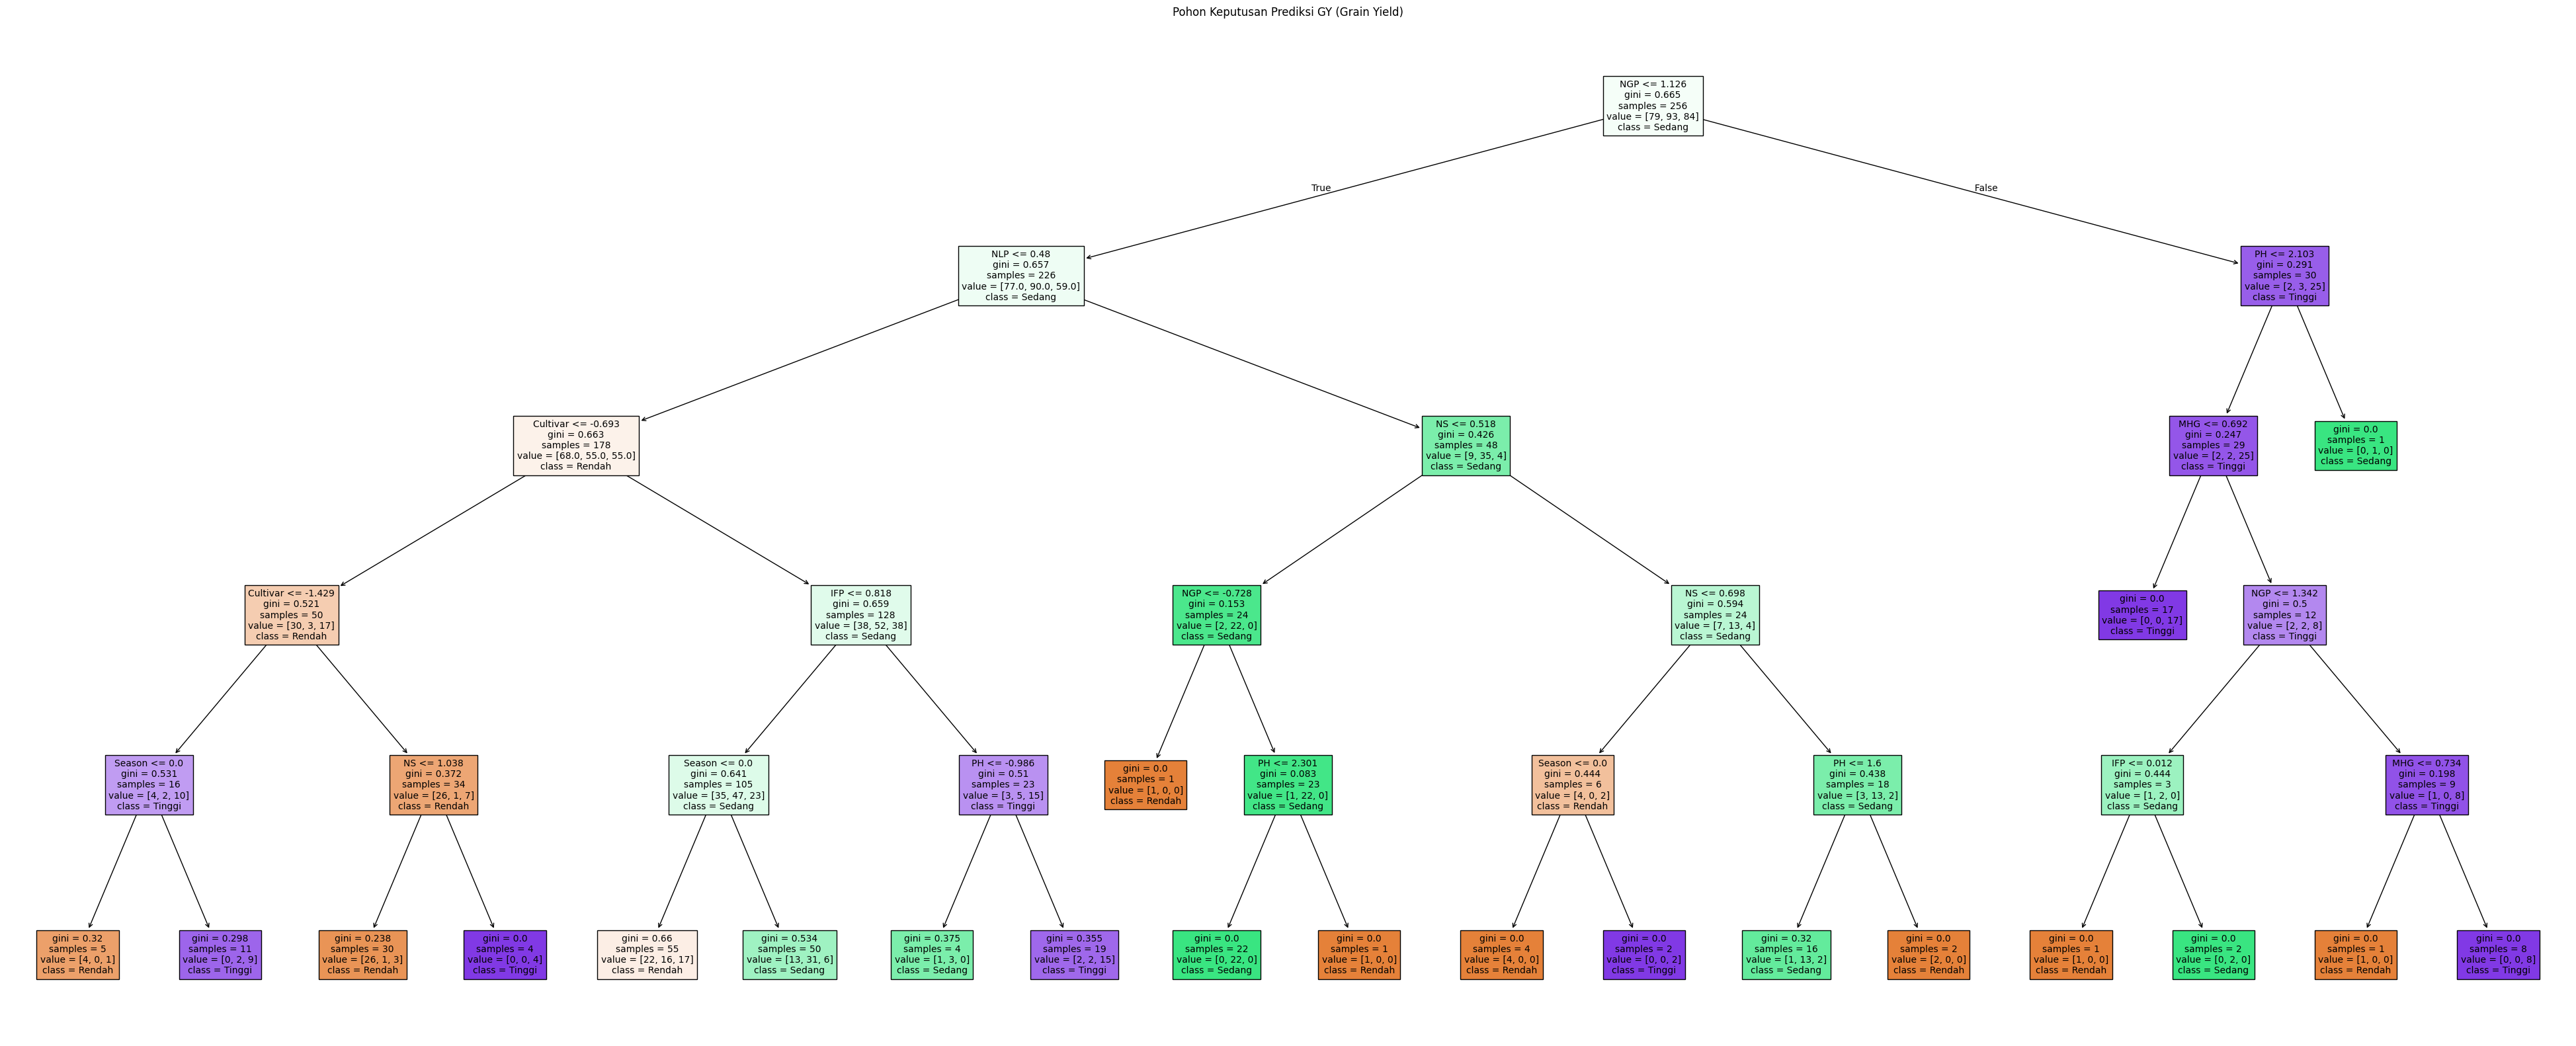

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Simpan nama kolom sebelum scaling
feature_names = X.columns

# Visualisasi pohon keputusan
plt.figure(figsize=(50, 20))
plot_tree(clf, feature_names=feature_names, class_names=[str(cls) for cls in clf.classes_], filled=True, fontsize=10)
plt.title("Pohon Keputusan Prediksi GY (Grain Yield)")
plt.show()


### **Modelling Klasifikasi Dataset Grain Yield (GY) menggunakan Gaussian Naive Bayes**

Pada pemodelan kali ini, tujuan utama adalah untuk menentukan kategori hasil panen (GY) dari suatu sampel berdasarkan fitur-fitur agronomi seperti musim tanam, varietas padi, panjang malai, jumlah gabah, berat gabah, dan lain sebagainya. Kategori hasil panen ini telah diklasifikasikan menjadi tiga kelas, yaitu: *Rendah, **Sedang, dan **Tinggi*.

Untuk membangun model klasifikasi ini, digunakan metode *Gaussian Naive Bayes (GNB)*, yaitu salah satu algoritma pembelajaran mesin berbasis probabilistik yang sederhana namun efektif, terutama untuk data dengan distribusi fitur yang mendekati normal (Gaussian).

### 1. Pembagian Dataset menjadi Data Latih dan Data Uji

Langkah pertama dalam proses pemodelan adalah membagi dataset menjadi dua bagian utama:

* *Data Latih (Training Set)*: digunakan untuk melatih model.
* *Data Uji (Testing Set)*: digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya.

Dalam pemodelan ini, digunakan rasio *80% data latih dan 20% data uji*, yang merupakan pembagian umum dalam praktik pembelajaran mesin. Namun, rasio ini bersifat fleksibel dan dapat disesuaikan tergantung kebutuhan serta jumlah data yang tersedia.

### 2. Menghitung Probabilitas Awal (Prior Probability)

Setelah pembagian data, langkah selanjutnya adalah menghitung probabilitas awal (prior) untuk masing-masing kelas hasil panen (Rendah, Sedang, Tinggi). Prior ini dihitung dengan:

* Menghitung jumlah sampel pada masing-masing kelas di data latih.
* Membagi jumlah tersebut dengan total sampel data latih.

Nilai prior ini mencerminkan kemungkinan suatu data termasuk ke dalam suatu kelas tanpa mempertimbangkan fitur-fitur lainnya.

### 3. Menghitung Rata-rata dan Standar Deviasi Tiap Fitur

Untuk setiap kelas hasil panen, dihitung nilai rata-rata (*mean) dan standar deviasi (standard deviation*) dari setiap fitur numerik seperti panjang malai, jumlah gabah bernas, berat 1000 gabah, dan sebagainya. Langkah ini penting karena Gaussian Naive Bayes mengasumsikan bahwa nilai-nilai fitur mengikuti distribusi normal untuk setiap kelas target.

### 4. Menghitung Distribusi Gaussian
Selanjutnya, digunakan rumus distribusi Gaussian untuk menghitung probabilitas bahwa suatu nilai fitur berasal dari kelas tertentu:

$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Di mana:

* $x$ adalah nilai fitur input,
* $\mu$ adalah rata-rata fitur untuk kelas tertentu,
* $\sigma$ adalah standar deviasi fitur untuk kelas tersebut.

### 5. Menghitung Probabilitas Posterior

Dengan probabilitas Gaussian yang telah dihitung untuk setiap fitur, probabilitas posterior untuk masing-masing kelas dihitung dengan mengalikan semua probabilitas fitur (asumsi independensi antar fitur) dan dikalikan dengan prior dari kelas tersebut:

$$
P(C_i|x) \propto P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

Hasil ini memberikan gambaran tentang seberapa besar kemungkinan sebuah data termasuk ke dalam kelas tertentu berdasarkan seluruh fitur yang dimiliki.

### 6. Menentukan Prediksi Kelas
Langkah terakhir dalam proses klasifikasi adalah memilih kelas dengan nilai probabilitas posterior tertinggi sebagai hasil prediksi untuk data tersebut. Dengan kata lain, model memilih kelas hasil panen yang paling mungkin berdasarkan pola data latih.

---

Model Gaussian Naive Bayes yang dibangun dalam studi ini menunjukkan bagaimana pendekatan probabilistik dapat digunakan untuk mengklasifikasikan hasil panen berdasarkan fitur-fitur agronomi. Meskipun GNB mengasumsikan independensi antar fitur (yang sering kali tidak sepenuhnya benar dalam praktik), pendekatan ini tetap berguna sebagai baseline model yang cepat, efisien, dan mudah diinterpretasikan dalam konteks pertanian berbasis data.

Akurasi: 0.4375

=== Classification Report ===
              precision    recall  f1-score   support

      Rendah       0.42      0.59      0.49        17
      Sedang       0.45      0.50      0.47        26
      Tinggi       0.45      0.24      0.31        21

    accuracy                           0.44        64
   macro avg       0.44      0.44      0.42        64
weighted avg       0.44      0.44      0.42        64



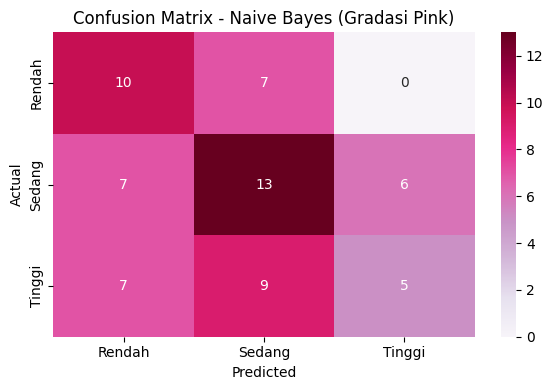

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model Naive Bayes ===
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# === 8. Evaluasi hasil prediksi ===
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=gnb.classes_, yticklabels=gnb.classes_,
            cmap='PuRd')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Gradasi Pink)")
plt.tight_layout()
plt.show()



### **Modelling Klasifikasi Dataset Grain Yield (GY) menggunakan K-Nearest Neighbor (K-NN)**

Model K-Nearest Neighbors (KNN) digunakan dalam penelitian ini untuk memprediksi kategori hasil panen (`GY`) menjadi tiga kelas, yaitu Rendah, Sedang, dan Tinggi, berdasarkan berbagai fitur agronomi seperti musim, varietas (cultivar), panjang malai, jumlah gabah, dan lain-lain. KNN merupakan metode pembelajaran berbasis instance (*instance-based learning*), yang melakukan klasifikasi berdasarkan kemiripan dengan data latih yang telah disimpan. Artinya, KNN tidak membentuk fungsi atau aturan eksplisit, tetapi mengandalkan pencarian tetangga terdekat untuk menentukan kelas dari data uji.

Sebelum proses pelatihan dilakukan, dataset dibagi menjadi dua bagian: 80% digunakan sebagai data latih dan 20% sebagai data uji. Pembagian ini merupakan praktik umum dalam supervised learning untuk memastikan bahwa model dapat diuji pada data yang tidak pernah dilihat sebelumnya, sehingga hasil evaluasinya lebih objektif.

Tahapan pra-pemrosesan dilakukan agar model KNN dapat bekerja secara optimal. Pertama, kolom target `GY` yang semula berupa data numerik kontinu dikonversi menjadi tiga kelas menggunakan metode *binning*, yaitu `Rendah`, `Sedang`, dan `Tinggi`, berdasarkan pembagian distribusi data. Selanjutnya, beberapa fitur kategorikal seperti `Season`, `Cultivar`, dan `Repetition` dikonversi menjadi data numerik menggunakan teknik Label Encoding, karena algoritma KNN hanya dapat bekerja dengan data numerik. Terakhir, dilakukan normalisasi terhadap seluruh fitur numerik menggunakan StandardScaler. Langkah ini penting karena KNN sangat sensitif terhadap skala data—fitur dengan nilai besar dapat mendominasi perhitungan jarak jika tidak dinormalisasi terlebih dahulu.

Secara konsep, KNN bekerja dengan menghitung jarak (umumnya Euclidean) antara data uji dan semua data latih. Setelah jarak dihitung, algoritma akan mengambil sejumlah tetangga terdekat sebanyak nilai *k* yang ditentukan (misalnya 5). Prediksi kemudian dilakukan berdasarkan voting mayoritas dari kelas yang dimiliki oleh tetangga-tetangga tersebut. Jika sebagian besar dari tetangga tersebut termasuk dalam kelas "Tinggi", maka prediksi untuk data uji juga akan menjadi "Tinggi".

Model KNN kemudian dievaluasi menggunakan beberapa metrik penting, seperti akurasi (jumlah prediksi benar dibanding total prediksi), classification report yang mencakup precision, recall, dan F1-score untuk setiap kelas, serta confusion matrix yang memberikan gambaran detail mengenai distribusi hasil prediksi benar dan salah pada tiap kelas. Selain itu, pemilihan nilai *k* juga dapat memengaruhi performa model, sehingga eksperimen dengan nilai-nilai *k* yang berbeda (misalnya 3, 5, atau 7) sangat dianjurkan untuk mendapatkan hasil terbaik.

Model K-Nearest Neighbors (KNN) terbukti dapat digunakan secara efektif untuk mengklasifikasikan kategori hasil panen berdasarkan berbagai fitur agronomi dalam dataset. Dengan pendekatan berbasis kemiripan antar data, KNN mampu memanfaatkan informasi dari data historis untuk memprediksi kelas hasil panen baru secara intuitif dan mudah dipahami. Selama data telah melalui tahapan pra-pemrosesan yang tepat, seperti encoding dan normalisasi, model ini dapat memberikan hasil yang andal dan konsisten. Keunggulan KNN terletak pada kesederhanaannya serta fleksibilitasnya dalam menangani berbagai jenis data, menjadikannya solusi yang relevan dalam konteks pertanian modern untuk membantu proses pengambilan keputusan secara cepat dan berbasis data.


Akurasi: 0.53125

Laporan Klasifikasi:
               precision    recall  f1-score   support

      Rendah       0.42      0.74      0.54        19
      Sedang       0.55      0.50      0.52        24
      Tinggi       0.89      0.38      0.53        21

    accuracy                           0.53        64
   macro avg       0.62      0.54      0.53        64
weighted avg       0.62      0.53      0.53        64



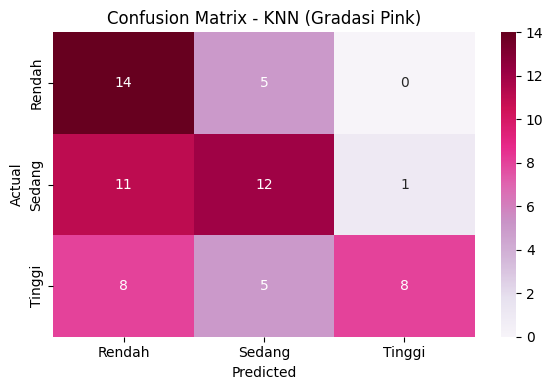

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Dataset ===
df = pd.read_csv('data.csv')  # Ganti path sesuai lokasi file Anda

# === 2. Encode kolom kategorikal ===
le = LabelEncoder()
df['Cultivar'] = le.fit_transform(df['Cultivar'])

# === 3. Pisahkan fitur dan target ===
X = df.drop('GY', axis=1)
y = df['GY']

# Ubah target menjadi kategori klasifikasi berdasarkan kuartil
y_binned = pd.qcut(y, q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# === 4. Split data training dan testing ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binned, test_size=0.2, random_state=42)

# === 5. Normalisasi fitur numerik ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Latih model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# === 7. Prediksi dan evaluasi ===
y_pred = knn.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm_df = pd.DataFrame(cm, index=knn.classes_, columns=knn.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='PuRd', fmt='d')  # <- ganti cmap di sini
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Gradasi Pink)")
plt.tight_layout()
plt.show()



## **Evaluasi Data**

Dari dataset Grain Yield (GY) diatas, akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

* Decision Tree = 45,31%
* Gaussian Naive Bayes = 43,75%
* K-Nearest Neighbor = 53,12%

Dari ketiga model diatas dapat disimpulkan bahwa K-Nearest Neighbor memiliki akurasi tertinggi yaitu 53,12%.